In [69]:
# Importing libraries for handling data, creating network, and exporting JSON
import pandas as pd
import networkx as nx
import json

In [70]:
# Importing data
df = pd.read_csv('https://github.com/umassdgithub/Fall-2023-DataViz/blob/main/Week-8-ForceSimulator/data/data_scopus.csv?raw=true')

In [71]:
## drop the rows with no Author Affiliations
df= df[~pd.isnull(df['Authors with affiliations'])].copy()

# Imputing zeroes in place of null values
df = df.fillna(0)

df

,Title,Year,EID,Abstract,Publisher,Conference name,Conference date,Authors,Author(s) ID,Authors with affiliations,Source title,Abbreviated Source Title,Cited by
0,Virtual reality applications for the built env...,2020,2-s2.0-85086464158,With its advanced capabilities of immersive an...,Elsevier B.V.,0,0,"Zhang Y., Liu H., Kang S.-C., Al-Hussein M.",57202536919;53984550800;57215426514;6603541102;,"Zhang, Y., Department of Civil and Environment...",Automation in Construction,Autom Constr,0.0
1,"Self-tracking while doing sport: Comfort, moti...",2020,2-s2.0-85082875828,The spread of wearable technologies is paving ...,Academic Press,0,0,"Rapp A., Tirabeni L.",23398572100;57191836654;,"Rapp, A., Computer Science Department, Univers...",International Journal of Human Computer Studies,Int J Hum Comput Stud,0.0
2,"Bridge damage: Detection, IFC-based semantic e...",2020,2-s2.0-85078194587,Building Information Modeling (BIM) representa...,Elsevier B.V.,0,0,"Isailović D., Stojanovic V., Trapp M., Richter...",57205293410;56421700900;24831175200;3619515940...,"Isailović, D., Department for Construction Pro...",Automation in Construction,Autom Constr,0.0
3,VR system for spatio-temporal visualization of...,2019,2-s2.0-85075706132,Social media analysis is helpful to understand...,Springer,0,0,"Okada K., Yoshida M., Itoh T., Czauderna T., S...",57201502480;57171240600;35373203100;2592569550...,"Okada, K., Ochanomizu University, Tokyo, Japan...",Multimedia Tools and Applications,Multimedia Tools Appl,0.0
4,DiseaSE: A biomedical text analytics system fo...,2019,2-s2.0-85074886243,Due to increasing volume and unstructured natu...,Academic Press Inc.,0,0,"Abulaish M., Parwez M.A., Jahiruddin",6505934038;57202719622;35590173900;,"Abulaish, M., Department of Computer Science, ...",Journal of Biomedical Informatics,J. Biomed. Informatics,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,Propositional n-traces: visualizing a problem ...,1995,2-s2.0-0029533881,"As part of an inter-disciplinary effort, we ar...","IEEE, Los Alamitos, CA, United States",Proceedings of the 1995 6th Annual IEEE Confer...,29 October 1995 through 3 October 1995,"Prevost Nathalie, Jorgenson Loki, Jennings R.E...",6603428086;55937115800;16412349600;7003348138;,"Prevost, Nathalie, Simon Fraser Univ, Burnaby,...",Proceedings of the IEEE Visualization Conference,Proc IEEE Visual Conf,0.0
566,Fast algorithms for visualizing fluid motion i...,1995,2-s2.0-0029487213,The plotting of streamlines is an effective wa...,"IEEE, Los Alamitos, CA, United States",Proceedings of the 1995 6th Annual IEEE Confer...,29 October 1995 through 3 October 1995,"Ueng S.K., Sikorski K., Ma Kwan-Liu",7006871353;35194562700;35242602500;,"Ueng, S.K., Univ of Utah, Salt Lake City, Unit...",Proceedings of the IEEE Visualization Conference,Proc IEEE Visual Conf,10.0
567,Fast normal estimation using surface character...,1995,2-s2.0-0029488955,To visualize the volume data acquired from com...,"IEEE, Los Alamitos, CA, United States",Proceedings of the 1995 6th Annual IEEE Confer...,29 October 1995 through 3 October 1995,"Shin Byeong Seok, Shin Yeong Gil",7103027750;7402816561;,"Shin, Byeong Seok, Seoul Natl Univ, Seoul, Sou...",Proceedings of the IEEE Visualization Conference,Proc IEEE Visual Conf,4.0
568,Supporting heterogeneous data import for data ...,1995,2-s2.0-0029193549,Effective data visualization requires the comb...,"ACM, New York, NY, United States",Proceedings of the 1995 ACM Symposium on Appli...,26 February 1995 through 28 February 1995,"Ford R., Thompson R., Thompson D.",57214569671;8713633000;7404935132;,"Ford, R., Univ of Montana, Missoula, United St...",Proceedings of the ACM Symposium on Applied Co...,Proc ACM Symp Appl Computing,0.0


In [72]:
# All authors by row
authors = df['Author(s) ID'].apply(lambda x:x.split(";")).to_list()

# Each author as single entry
author_ids_list = []
for items in authors:
  for author in items:
    if len(author)>0:
      author_ids_list.append(author)

print("List of all Author IDs:")
print(author_ids_list)

List of all Author IDs:
['57202536919', '53984550800', '57215426514', '6603541102', '23398572100', '57191836654', '57205293410', '56421700900', '24831175200', '36195159400', '6507346536', '6602981892', '57201502480', '57171240600', '35373203100', '25925695500', '57200282319', '6505934038', '57202719622', '35590173900', '14628356000', '7006162997', '57204951915', '36656019700', '8399981200', '57196119394', '57204952424', '57213421778', '57210571032', '36995837100', '6603639150', '57208132039', '57193809880', '57208123780', '7402264252', '7401951879', '57202410843', '57189029589', '57202995868', '56142103500', '57204058927', '57201030837', '57208132039', '14031725600', '57208123780', '35291520900', '57193082748', '57210803755', '56434720200', '57207859284', '25929119800', '55809641900', '57140618200', '55537800900', '57208164221', '57208160887', '57193387530', '56520099600', '39661236700', '6602415651', '39661131900', '55205882400', '7801408662', '36628922400', '57215455402', '5665194670

In [73]:
len(author_ids_list)

1879

In [74]:
# List of authors without duplicates
unique_authors_list = []
for row in author_ids_list:
  if unique_authors_list.count(row) <= 0:
    unique_authors_list.append(row)
  else:
    continue

print("List of unique Author IDs:")
print(unique_authors_list)

List of unique Author IDs:
['57202536919', '53984550800', '57215426514', '6603541102', '23398572100', '57191836654', '57205293410', '56421700900', '24831175200', '36195159400', '6507346536', '6602981892', '57201502480', '57171240600', '35373203100', '25925695500', '57200282319', '6505934038', '57202719622', '35590173900', '14628356000', '7006162997', '57204951915', '36656019700', '8399981200', '57196119394', '57204952424', '57213421778', '57210571032', '36995837100', '6603639150', '57208132039', '57193809880', '57208123780', '7402264252', '7401951879', '57202410843', '57189029589', '57202995868', '56142103500', '57204058927', '57201030837', '14031725600', '35291520900', '57193082748', '57210803755', '56434720200', '57207859284', '25929119800', '55809641900', '57140618200', '55537800900', '57208164221', '57208160887', '57193387530', '56520099600', '39661236700', '6602415651', '39661131900', '55205882400', '7801408662', '36628922400', '57215455402', '56651946700', '55460966100', '5561633

In [75]:
len(unique_authors_list)

1552

In [76]:
# Function to get each author's affiliated country
def getCountry(author_id):
  df_temp = df.copy()
  rowIndex = 0;
  # Iterrates through every row of the dataframe until the first occurance of the authorID that was passed is found
  for row in df_temp.iterrows():
    # Try block to handle error when author is not in the row
    try:
      index = df_temp.iloc[rowIndex]['Author(s) ID'].split(";").index(author_id)
      country = df_temp.iloc[rowIndex]['Authors with affiliations'].split(";")[index].split(",")[-1].strip()
      # If authors have no affiliated country, they are filled as 'India'
      if (len(country) > 15) or (len(country) <= 2):
        country = "India"
      return country
    except:
      # Counter to get proper row index. Only increments to next row if author was not found in current row
      rowIndex += 1
      continue

In [77]:
# Calling the function and populating list of author countries
author_countries_list = []

for index in author_ids_list:
  author_countries_list.append(getCountry(index))

print("First 5 entries of author_countries_list:")
print(author_countries_list[:5])

First 5 entries of author_countries_list:
['Canada', 'United States', 'Canada', 'Canada', 'Italy']


In [78]:
# Adding nodes
nodes = []
for row in range(0, len(author_ids_list)):
  # Only adds node if the pair doesn't already exist in the list
  if nodes.count((author_ids_list[row], {"Country": author_countries_list[row]})) <= 0:
    nodes.append((author_ids_list[row], {
        "Country": author_countries_list[row]
    }))
  else:
    continue

In [79]:
nodes[0]

('57202536919', {'Country': 'Canada'})

In [80]:
len(nodes)

1552

In [89]:
# Creating the list of edges
edges = []

for row in unique_authors_list:
  current_author = row
  # Searches each row in the data frame for the presence of the current author
  for index in df.iterrows():
    # If there are other authors, we must investigate further
    if ";" in index[1]['Author(s) ID']:
      # Gets all the authors in the row
      authors = index[1]['Author(s) ID'][:-1].split(";")
      # If the current author is in the row, must investigate further
      if authors.count(current_author) > 0:
        # For all the authors in the row that are not the current author, create an edge
        for author in authors:
          if author != current_author:
            edges.append((current_author, author))
          else:
            continue
      else:
        continue
    else:
      continue

In [90]:
edges[0]

('57202536919', '53984550800')

In [91]:
len(edges)

6380

In [92]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [93]:
pos = nx.drawing.circular_layout(G)

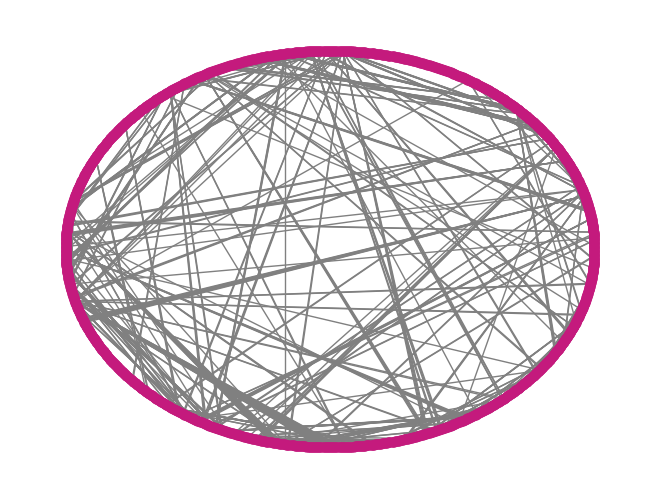

In [94]:
nx.draw(G, pos=pos, node_size = 40, node_color='#c41a7d', with_labels=False, edge_color='gray')

In [95]:
from networkx.readwrite import json_graph

In [96]:
# Exporting file
with open("MA3-Tiyasa_networkX.json", 'w') as f:
  json.dump(json_graph.node_link_data(G), f)